In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


- `Independent feature` : YearsExperience
- `Dependent feature` : Salary
-  Supervised Learning Problem (Labelled Data)
-  Dependent variable is continuous numerical hence it is a regression problem

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

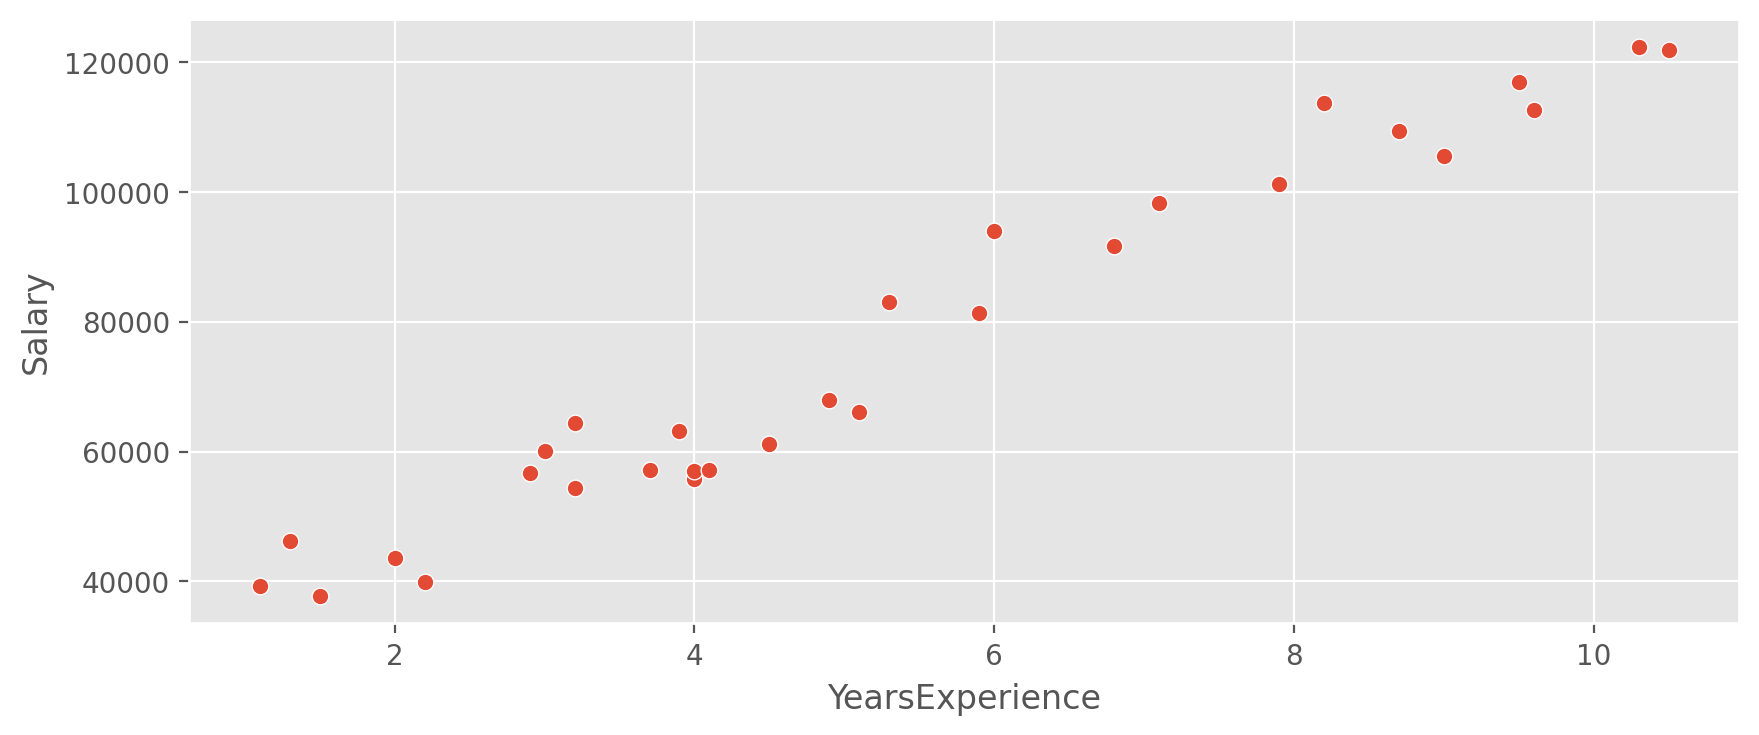

In [8]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot('YearsExperience', 'Salary', data = df)

- Only One independent feature
- The relationship between dependent and independent variable is linear
- Simple linear regression is the suitable algorithm

In [11]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:ylabel='Salary'>

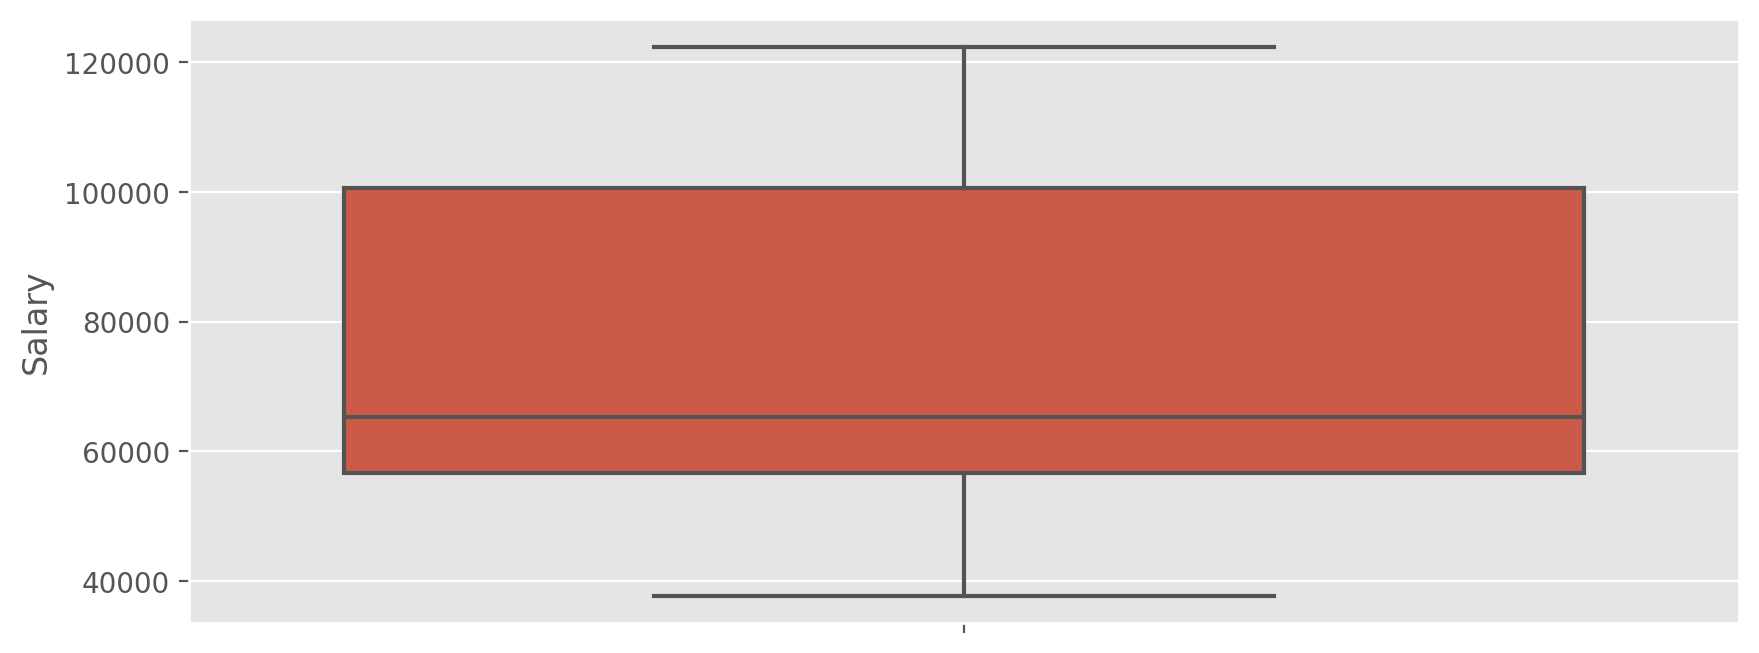

In [10]:
plt.figure(figsize = (10,4), dpi = 200)
sns.boxplot( y = 'Salary', data = df)

<AxesSubplot:ylabel='YearsExperience'>

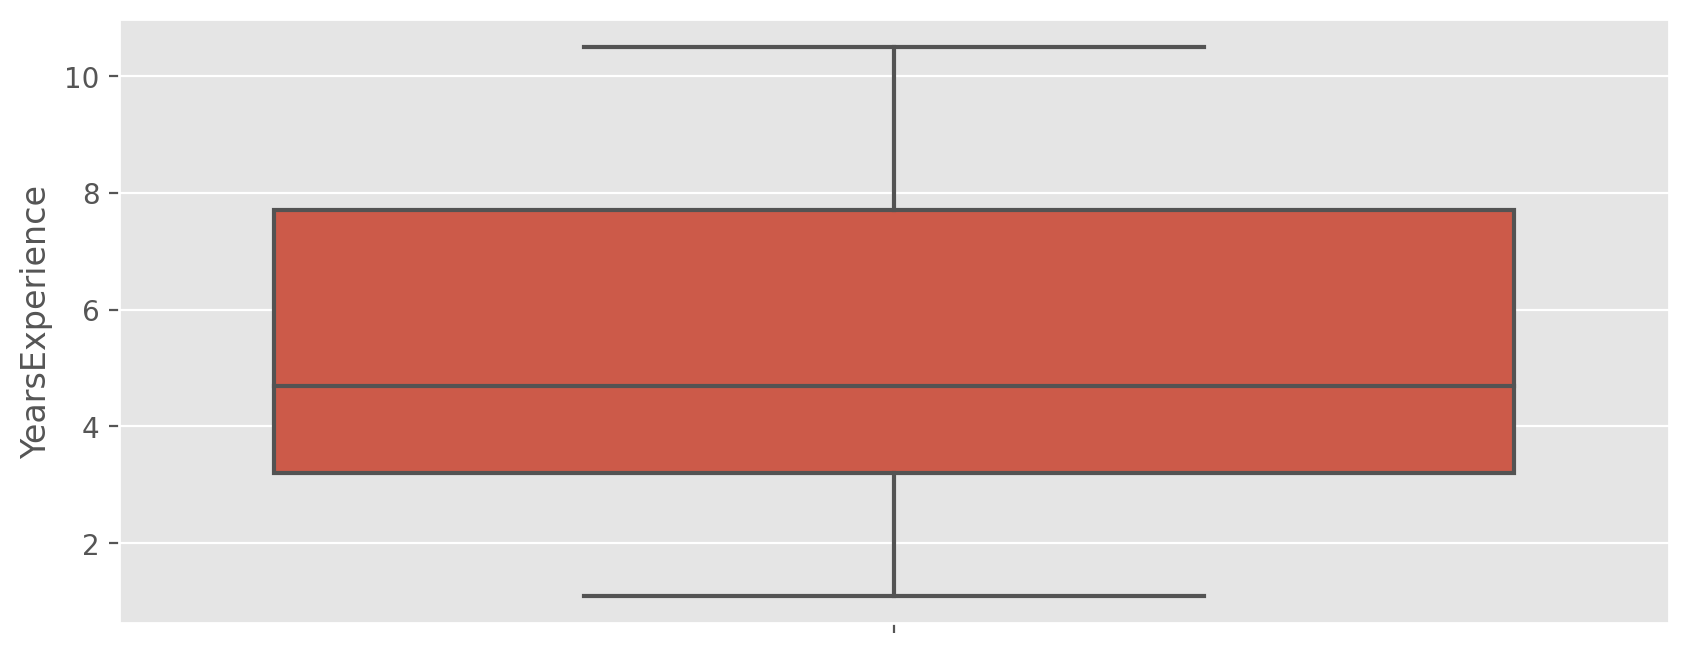

In [13]:
plt.figure(figsize = (10,4), dpi = 200)
sns.boxplot( y = 'YearsExperience', data = df)

In [14]:
X = df[['YearsExperience']].values
Y = df[['Salary']].values

In [15]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [16]:
Y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872]], dtype=int64)

In [18]:
print('Independent feature Shape : ', X.shape)
print('Dependent  feature  Shape : ', Y.shape)

Independent feature Shape :  (30, 1)
Dependent  feature  Shape :  (30, 1)


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [20]:
print('Training Data Shape    : ', x_train.shape)
print('Training Labels Shape  : ', y_train.shape)
print('Testing Data Shape     : ', x_test.shape)
print('Testing Labels Shape   : ', y_test.shape)

Training Data Shape    :  (21, 1)
Training Labels Shape  :  (21, 1)
Testing Data Shape     :  (9, 1)
Testing Labels Shape   :  (9, 1)


# Training The Model

In [21]:
from sklearn.linear_model import LinearRegression                         # import the class
regressor = LinearRegression()                                            # create the object
regressor.fit(x_train, y_train)                                           # fit the object

LinearRegression()

In [22]:
regressor.coef_                                                     # B1

array([[9298.06674988]])

In [23]:
regressor.intercept_                                                # B0

array([27182.22562441])

##  Y' = B0  +  B1 * X
###  Y' = 27182.22  +  9298.06 * X

In [24]:
regressor.predict([[20]])

array([[213143.56062195]])

In [25]:
27182.22 + 9298.06 * 20

213143.41999999998

In [28]:
pred_train = regressor.predict(x_train)
pred_test = regressor.predict(x_test)

from sklearn.metrics import r2_score
print('Training Data Score : ', r2_score(y_train, pred_train))
print('Testing Data Score  : ', r2_score(y_test, pred_test))

Training Data Score :  0.9499163703220002
Testing Data Score  :  0.9624024983951907


In [40]:
def predict_salary(years_of_exp):
    years_of_exp = np.array(years_of_exp).reshape(-1,1)
    salary = regressor.predict(years_of_exp)
    print('Expected Salary for a candidate with {} years of experience is : {}'.format(years_of_exp[0][0], int(salary[0][0])))

In [41]:
predict_salary(10)

Expected Salary for a candidate with 10 years of experience is : 120162


In [46]:
def predict_salaries(*years_of_exp):
    years_of_exp = np.array(years_of_exp).reshape(-1,1)
    salaries = regressor.predict(years_of_exp)
    for i in range(len(years_of_exp)):
        print('Expected Salary for a candidate with {} years of experience is : {}'.format(years_of_exp[i][0], int(salaries[i][0])))

In [49]:
predict_salaries(1.9, 3.5, 9.8, 30, 12.5)

Expected Salary for a candidate with 1.9 years of experience is : 44848
Expected Salary for a candidate with 3.5 years of experience is : 59725
Expected Salary for a candidate with 9.8 years of experience is : 118303
Expected Salary for a candidate with 30.0 years of experience is : 306124
Expected Salary for a candidate with 12.5 years of experience is : 143408


## Visualising the model fit

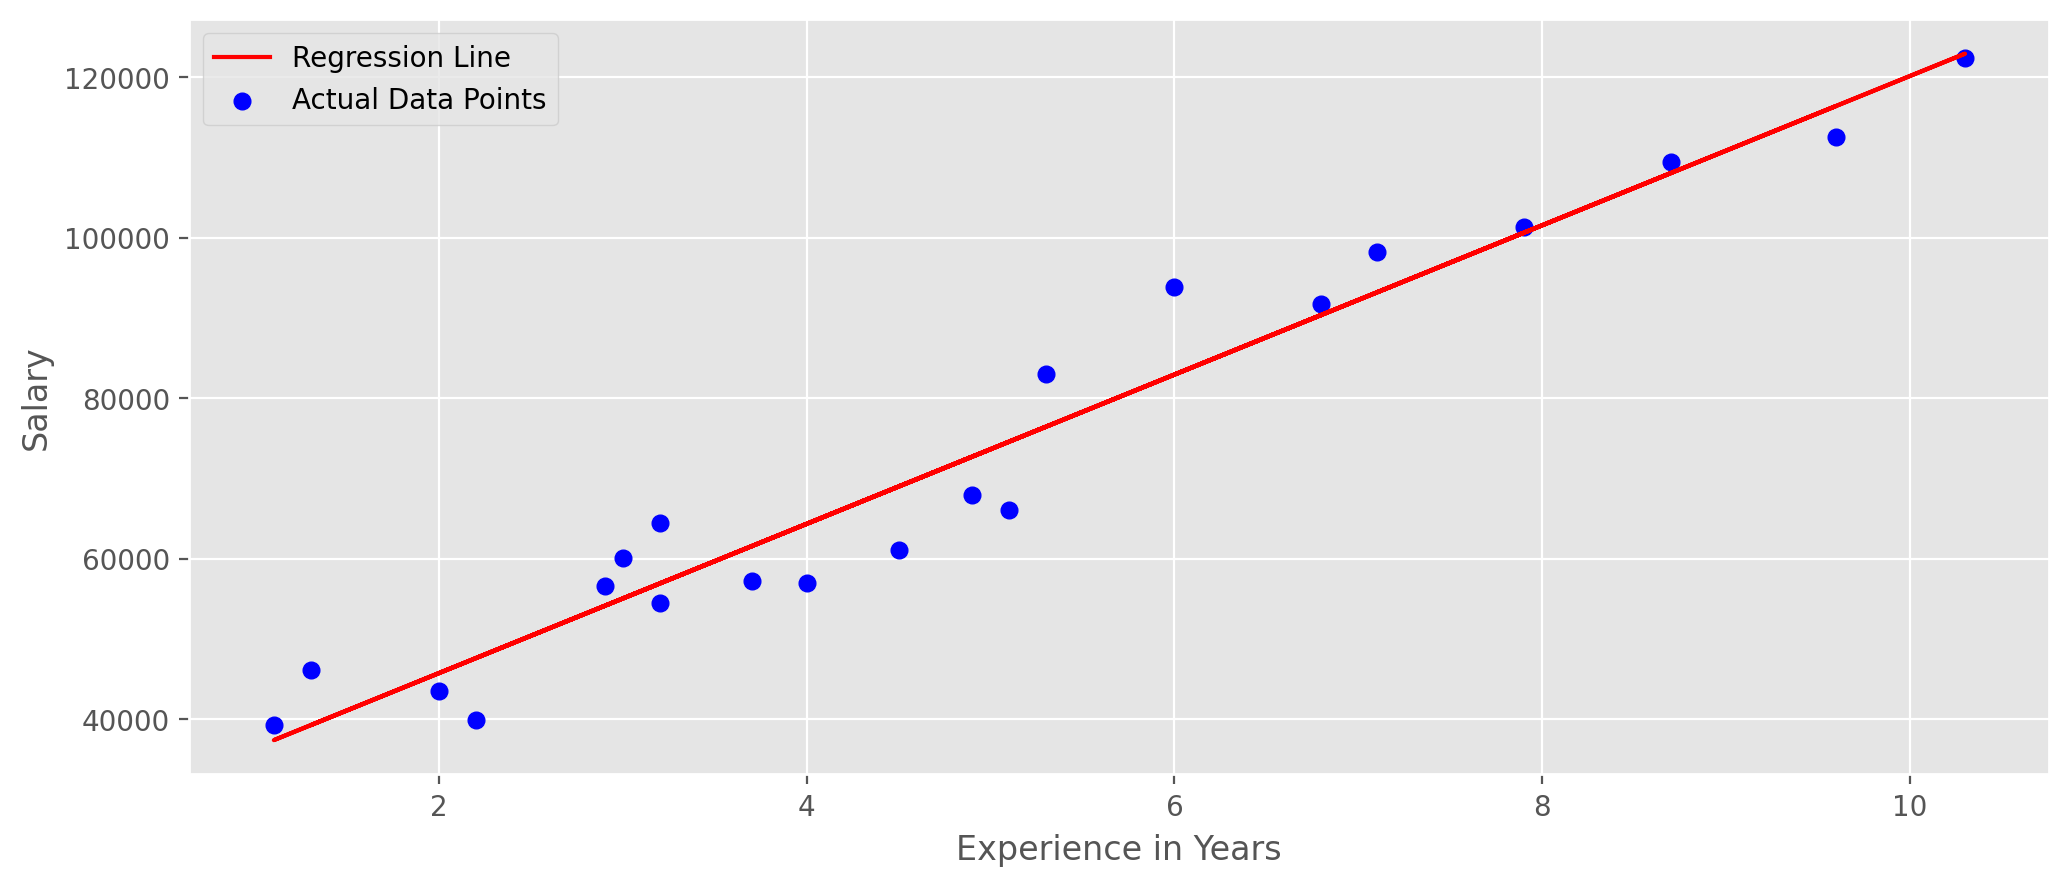

In [51]:
plt.figure(figsize = (12,5), dpi = 200)
plt.scatter(x_train, y_train, color = 'blue', label = 'Actual Data Points')
plt.plot(x_train, pred_train, color = 'red' , label = 'Regression Line')
plt.xlabel('Experience in Years')
plt.ylabel('Salary')
plt.legend()

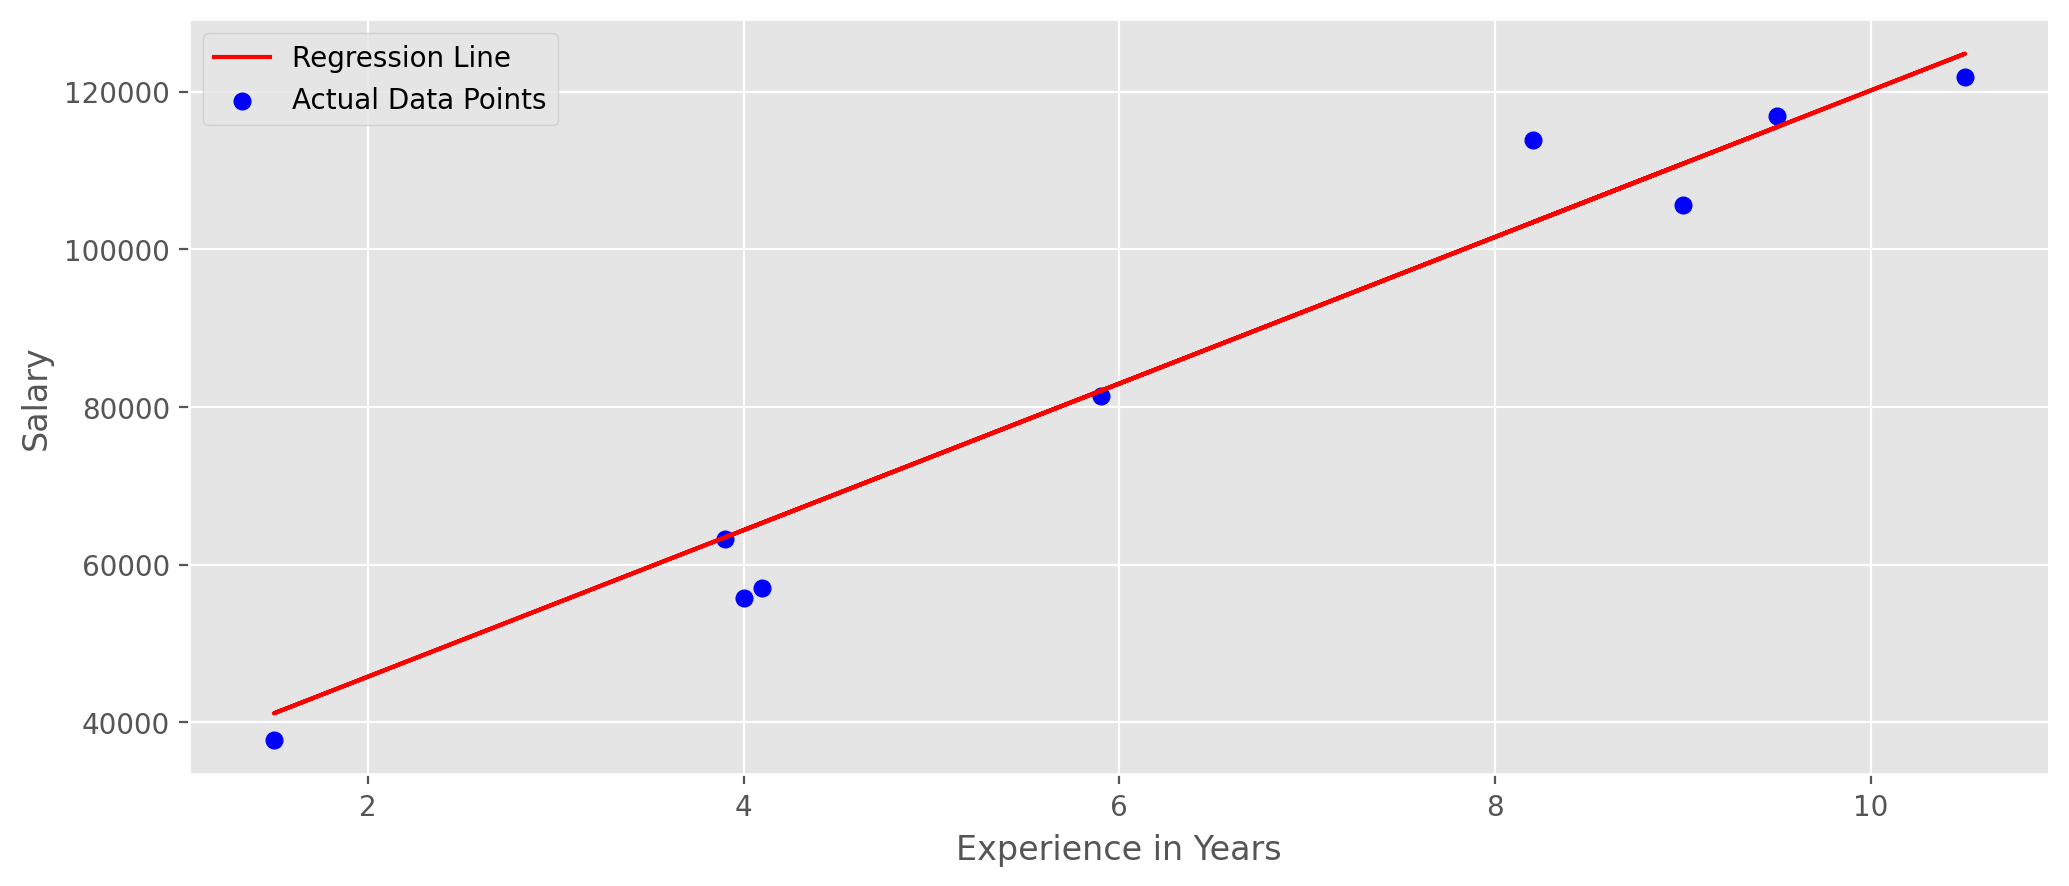

In [52]:
plt.figure(figsize = (12,5), dpi = 200)
plt.scatter(x_test, y_test, color = 'blue', label = 'Actual Data Points')
plt.plot(x_test, pred_test, color = 'red' , label = 'Regression Line')
plt.xlabel('Experience in Years')
plt.ylabel('Salary')
plt.legend()

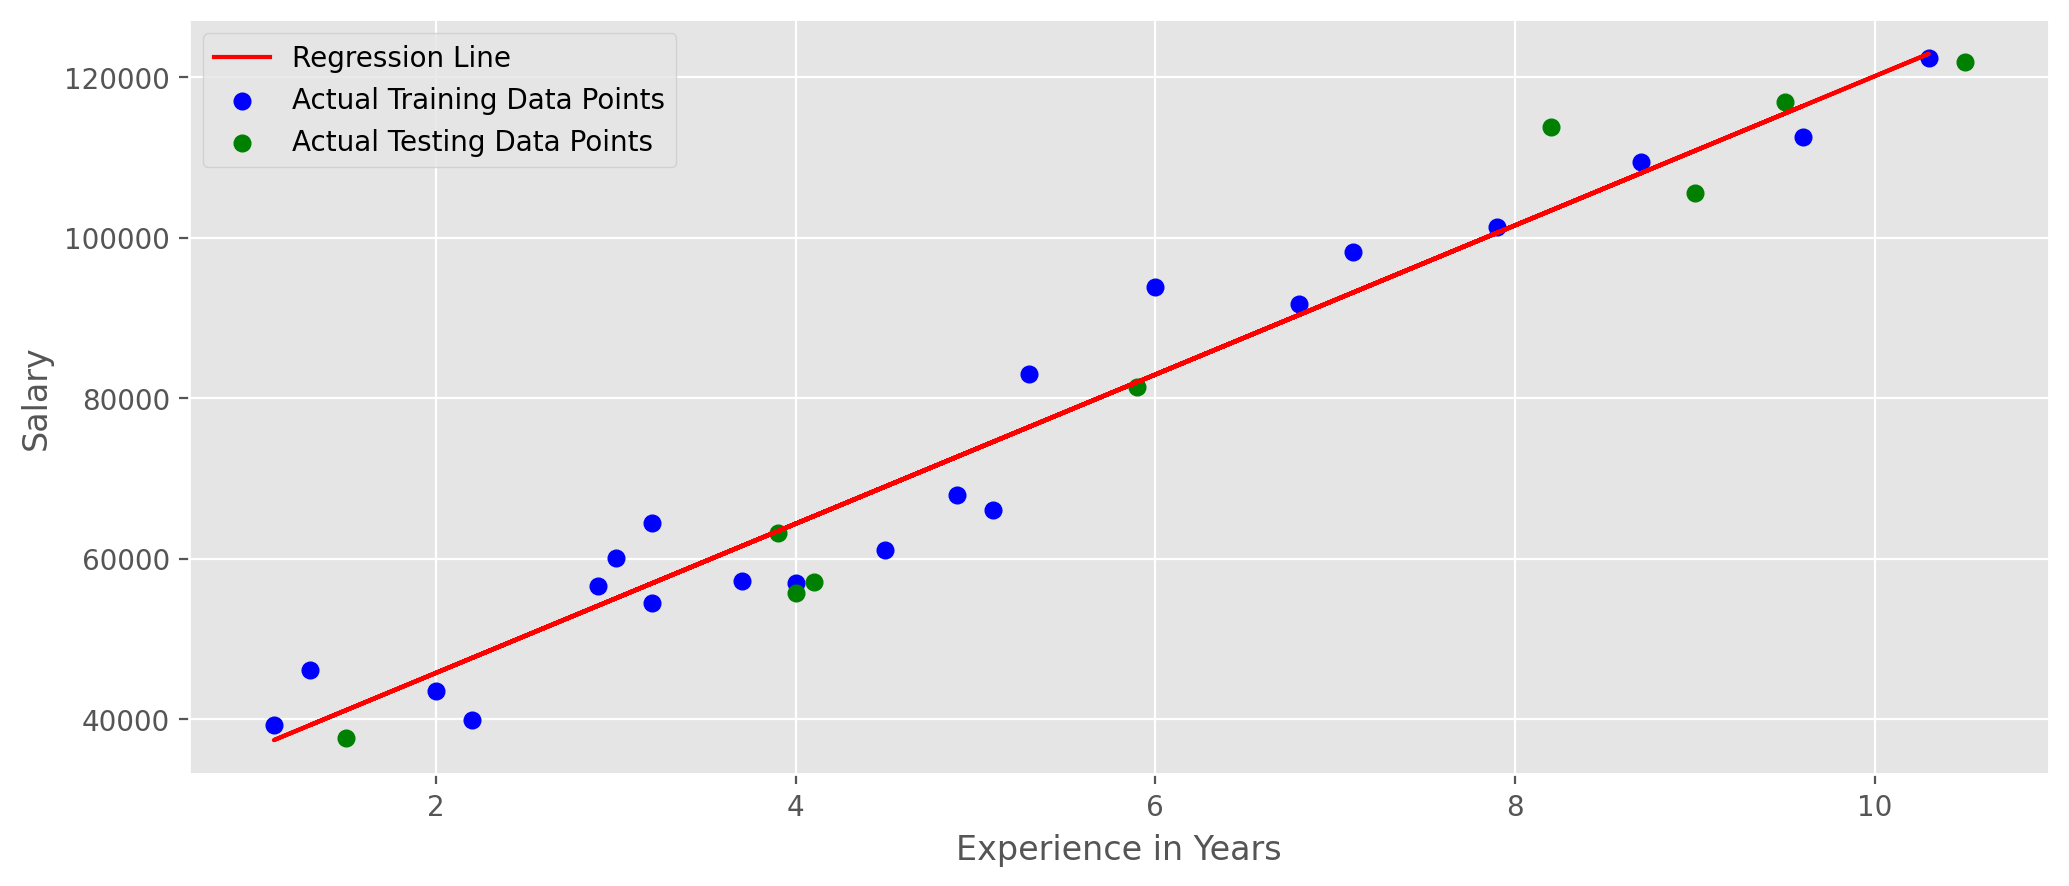

In [55]:
plt.figure(figsize = (12,5), dpi = 200)
plt.scatter(x_train, y_train, color = 'blue', label = 'Actual Training Data Points')
plt.scatter(x_test, y_test, color = 'green', label = 'Actual Testing Data Points')
plt.plot(x_train, pred_train, color = 'red' , label = 'Regression Line')
plt.xlabel('Experience in Years')
plt.ylabel('Salary')
plt.legend()

In [59]:
a = np.array([1,2,3])
a.shape

(3,)

In [60]:
a.reshape(-1,1)

array([[1],
       [2],
       [3]])